# Fraud Detection Imbalanced Classification Exam Solution

This notebook creates a synthetic imbalanced fraud dataset (fraud.csv) and solves the exam question step by step: imbalance ratio, visualization, baseline model, rebalancing techniques, metrics, and discussion.

In [1]:
# 1. Create Synthetic Imbalanced Fraud Dataset
import numpy as np
import pandas as pd
np.random.seed(42)
n = 1000
n_fraud = int(n * 0.05)
n_legit = n - n_fraud
# Features: amount, time, feature1, feature2
amount = np.concatenate([np.random.normal(50, 10, n_legit), np.random.normal(200, 50, n_fraud)])
time = np.concatenate([np.random.normal(1000, 300, n_legit), np.random.normal(5000, 1000, n_fraud)])
feature1 = np.random.normal(0, 1, n)
feature2 = np.random.normal(0, 1, n)
is_fraud = np.array([0]*n_legit + [1]*n_fraud)
df = pd.DataFrame({
    'amount': amount,
    'time': time,
    'feature1': feature1,
    'feature2': feature2,
    'is_fraud': is_fraud
})
df.to_csv('fraud.csv', index=False)
df.head()

,amount,time,feature1,feature2,is_fraud
0,54.967142,1419.806631,-0.675178,-1.907808,0
1,48.617357,1277.390105,-0.144519,-0.860385,0
2,56.476885,1017.889111,-0.792420,-0.413606,0
3,65.230299,805.918967,-0.307962,1.887688,0
4,47.658466,1209.466994,-1.893615,0.556553,0


## a. Report Imbalance Ratio
- Calculate and print the ratio of minority to majority class.

In [2]:
counts = df['is_fraud'].value_counts()
imbalance_ratio = counts[1] / counts[0]
print(f'Imbalance ratio (fraud/legit): {imbalance_ratio:.3f}')
print(counts)

Imbalance ratio (fraud/legit): 0.053
is_fraud
0    950
1     50
Name: count, dtype: int64


## b. Visualize Dataset in 2D and Comment

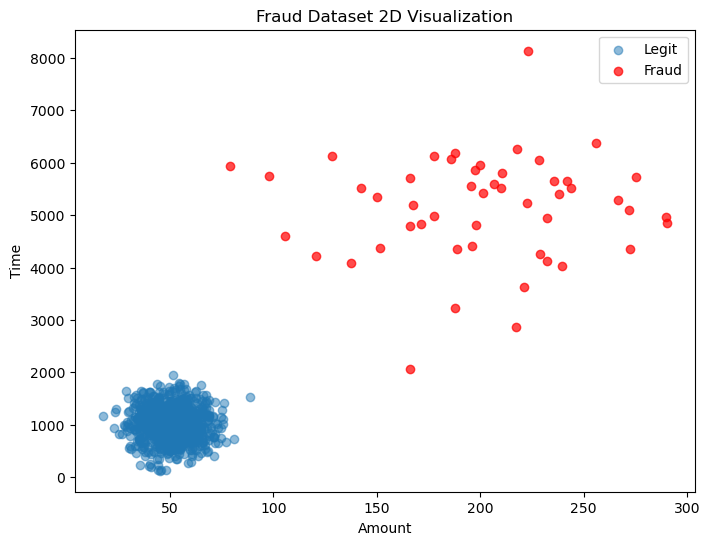

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df[df['is_fraud']==0]['amount'], df[df['is_fraud']==0]['time'], alpha=0.5, label='Legit')
plt.scatter(df[df['is_fraud']==1]['amount'], df[df['is_fraud']==1]['time'], alpha=0.7, label='Fraud', color='red')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Fraud Dataset 2D Visualization')
plt.legend()
plt.show()

## c. Baseline Model (Logistic Regression) Without Rebalancing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## d. Apply Rebalancing Techniques (Under-sampling, Over-sampling, SMOTE, Tomek Links)

In [9]:
# Install imbalanced-learn if needed: pip install imbalanced-learn
!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Under-sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
# Over-sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
# Tomek Links
tl = TomekLinks(sampling_strategy='auto')
X_tl, y_tl = tl.fit_resample(X_train, y_train)

## e. Visualize Dataset Before and After Rebalancing

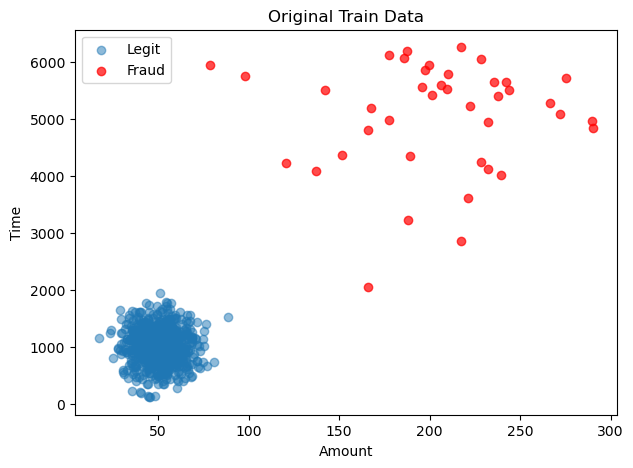

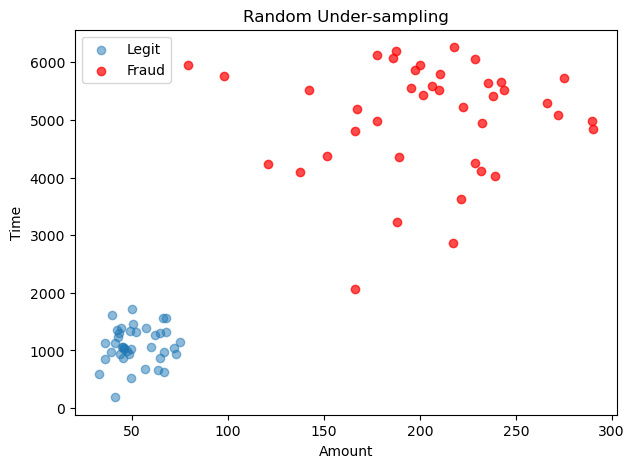

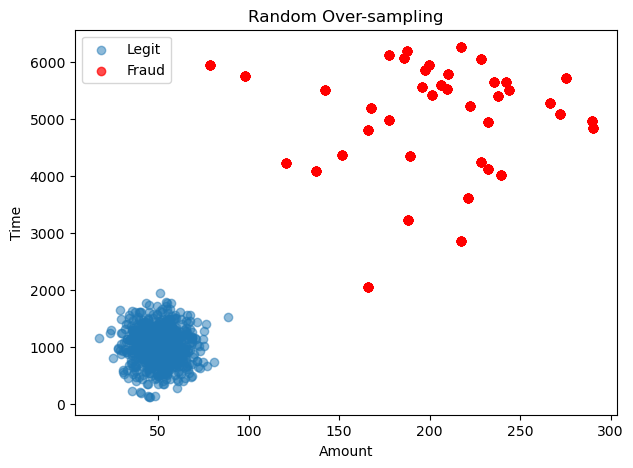

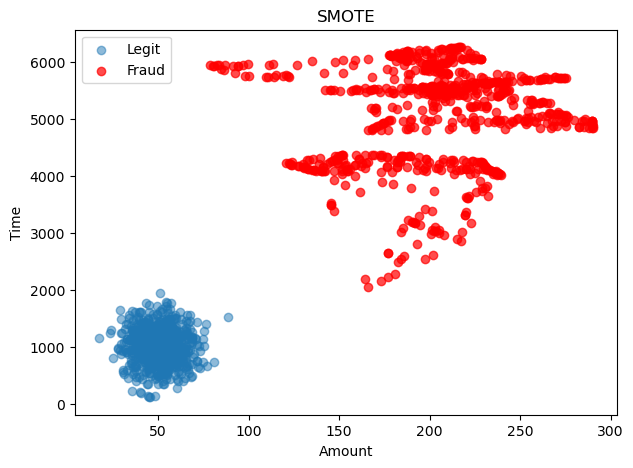

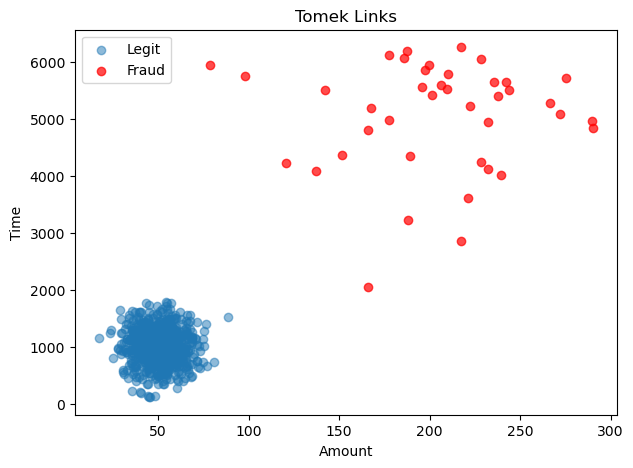

In [11]:
def plot_2d(X, y, title):
    # Ensure X is a numpy array for indexing
    if hasattr(X, 'values'):
        X = X.values
    plt.figure(figsize=(7,5))
    plt.scatter(X[y==0][:,0], X[y==0][:,1], alpha=0.5, label='Legit')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], alpha=0.7, label='Fraud', color='red')
    plt.xlabel('Amount')
    plt.ylabel('Time')
    plt.title(title)
    plt.legend()
    plt.show()

plot_2d(X_train, y_train.values, 'Original Train Data')
plot_2d(X_rus, y_rus, 'Random Under-sampling')
plot_2d(X_ros, y_ros, 'Random Over-sampling')
plot_2d(X_smote, y_smote, 'SMOTE')
plot_2d(X_tl, y_tl, 'Tomek Links')

## f. Train Model on Rebalanced Datasets and Compare Performance

In [ ]:
def train_and_report(X_res, y_res, X_test, y_test, scaler):
    X_res_scaled = scaler.fit_transform(X_res)
    X_test_scaled = scaler.transform(X_test)
    clf = LogisticRegression()
    clf.fit(X_res_scaled, y_res)
    y_pred = clf.predict(X_test_scaled)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Classification Report:', classification_report(y_test, y_pred))
print('Random Under-sampling:')
train_and_report(X_rus, y_rus, X_test, y_test, scaler)
print('Random Over-sampling:')
train_and_report(X_ros, y_ros, X_test, y_test, scaler)
print('SMOTE:')
train_and_report(X_smote, y_smote, X_test, y_test, scaler)
print('Tomek Links:')
train_and_report(X_tl, y_tl, X_test, y_test, scaler)

Random Under-sampling:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Random Over-sampling:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

SMOTE:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:               precision    recall  f1-score   support

     

: 

## Discussion: Did Rebalancing Help Train a Better Model?
- Compare metrics and justify which technique improved minority class detection and overall performance.